#1. Data Collection

## Install dependencies

In [2]:
!pip install sec-edgar-downloader
!pip install transformers
!pip install yfinance --quiet
!pip install tqdm --quiet
!pip install tiktoken --quiet
!pip install textblob --quiet
!pip install wordcloud
!pip install sentence-transformers --quiet
!pip install keybert --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.5 MB/s eta 0:00:00


In [3]:
from sec_edgar_downloader import Downloader
import os
from transformers import pipeline, AutoTokenizer
import yfinance as yf
import pandas as pd
import re
from bs4 import BeautifulSoup
from datetime import datetime
import tiktoken
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from keybert import KeyBERT
SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
os.environ['TRANSFORMERS_OFFLINE'] = '1'


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Download data

In [ ]:
download_path = "edgar_filings"
dl = Downloader(download_path, "mehthegirl@gmail.com")
dl.get("10-Q", "AAPL", limit=14)

14

In [ ]:
base_dir = os.path.join("sec-edgar-filings", "AAPL", "10-Q")
for quarter_folder in sorted(os.listdir(base_dir)):
    full_path = os.path.join(base_dir, quarter_folder)
    filing_files = os.listdir(full_path)
    print(f"{quarter_folder}: {[file for file in filing_files if file.endswith('.txt')]}")

0000320193-20-000062: ['full-submission.txt']
0000320193-21-000010: ['full-submission.txt']
0000320193-21-000056: ['full-submission.txt']
0000320193-21-000065: ['full-submission.txt']
0000320193-22-000007: ['full-submission.txt']
0000320193-22-000059: ['full-submission.txt']
0000320193-22-000070: ['full-submission.txt']
0000320193-23-000006: ['full-submission.txt']
0000320193-23-000064: ['full-submission.txt']
0000320193-23-000077: ['full-submission.txt']
0000320193-24-000006: ['full-submission.txt']
0000320193-24-000069: ['full-submission.txt']
0000320193-24-000081: ['full-submission.txt']
0000320193-25-000008: ['full-submission.txt']


In [ ]:
sample_filing = os.path.join(base_dir, os.listdir(base_dir)[0], "full-submission.txt")
with open(sample_filing, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
    print("".join(lines[:30]))

<SEC-DOCUMENT>0000320193-21-000010.txt : 20210128
<SEC-HEADER>0000320193-21-000010.hdr.sgml : 20210128
<ACCEPTANCE-DATETIME>20210127180306
ACCESSION NUMBER:		0000320193-21-000010
CONFORMED SUBMISSION TYPE:	10-Q
PUBLIC DOCUMENT COUNT:		76
CONFORMED PERIOD OF REPORT:	20201226
FILED AS OF DATE:		20210128
DATE AS OF CHANGE:		20210127

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			Apple Inc.
		CENTRAL INDEX KEY:			0000320193
		STANDARD INDUSTRIAL CLASSIFICATION:	ELECTRONIC COMPUTERS [3571]
		IRS NUMBER:				942404110
		STATE OF INCORPORATION:			CA
		FISCAL YEAR END:			0925

	FILING VALUES:
		FORM TYPE:		10-Q
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-36743
		FILM NUMBER:		21561251

	BUSINESS ADDRESS:	
		STREET 1:		ONE APPLE PARK WAY
		CITY:			CUPERTINO
		STATE:			CA



# 2. Data Preprocessing

## Section extraction

In [ ]:
def extract_sections_from_html(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text(separator="\n")

    lines = text.splitlines()
    cleaned_lines = [line.strip() for line in lines if line.strip()]

    sections = {
        "MD&A": ("item 2", "management", "item 3", "quantitative"),
        "Controls": ("item 4", "controls", "item 5", "other")
    }

    results = {}

    for section, (start_kw1, start_kw2, end_kw1, end_kw2) in sections.items():
        start_idx = None
        end_idx = None

        for idx, line in enumerate(cleaned_lines):
            lower_line = line.lower()
            if start_kw1 in lower_line and start_kw2 in lower_line:
                start_idx = idx
            if start_idx is not None and end_kw1 in lower_line and end_kw2 in lower_line:
                end_idx = idx
                break

        if start_idx is not None and end_idx is not None and end_idx > start_idx:
            results[section] = "\n".join(cleaned_lines[start_idx:end_idx])
        else:
            results[section] = f"{section} section not found."

    return results



In [ ]:
# Load one sample filing for extraction
sample_filing = os.path.join(base_dir, os.listdir(base_dir)[0], "full-submission.txt")
with open(sample_filing, "r", encoding="utf-8", errors="ignore") as f:
    raw_text = f.read()

print(raw_text[:1000])  # Preview first 1000 characters


<SEC-DOCUMENT>0000320193-21-000010.txt : 20210128
<SEC-HEADER>0000320193-21-000010.hdr.sgml : 20210128
<ACCEPTANCE-DATETIME>20210127180306
ACCESSION NUMBER:		0000320193-21-000010
CONFORMED SUBMISSION TYPE:	10-Q
PUBLIC DOCUMENT COUNT:		76
CONFORMED PERIOD OF REPORT:	20201226
FILED AS OF DATE:		20210128
DATE AS OF CHANGE:		20210127

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			Apple Inc.
		CENTRAL INDEX KEY:			0000320193
		STANDARD INDUSTRIAL CLASSIFICATION:	ELECTRONIC COMPUTERS [3571]
		IRS NUMBER:				942404110
		STATE OF INCORPORATION:			CA
		FISCAL YEAR END:			0925

	FILING VALUES:
		FORM TYPE:		10-Q
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-36743
		FILM NUMBER:		21561251

	BUSINESS ADDRESS:	
		STREET 1:		ONE APPLE PARK WAY
		CITY:			CUPERTINO
		STATE:			CA
		ZIP:			95014
		BUSINESS PHONE:		(408) 996-1010

	MAIL ADDRESS:	
		STREET 1:		ONE APPLE PARK WAY
		CITY:			CUPERTINO
		STATE:			CA
		ZIP:			95014

	FORMER COMPANY:	
		FORMER CONFORMED NAME:	APPLE INC
		DATE OF NAME CHANGE

In [ ]:
res = extract_sections_from_html(raw_text)
print(res["MD&A"])

Item 2.    Management’s Discussion and Analysis of Financial Condition and Results of Operations
This section and other parts of this Quarterly Report on Form 10-Q (“Form 10-Q”) contain forward-looking statements, within the meaning of the Private Securities Litigation Reform Act of 1995, that involve risks and uncertainties. Forward-looking statements provide current expectations of future events based on certain assumptions and include any statement that does not directly relate to any historical or current fact. For example, statements in this Form 10-Q regarding the potential future impact of the COVID-19 pandemic on the Company’s business and results of operations are forward-looking statements
.
Forward-looking statements can also be identified by words such as “future,” “anticipates,” “believes,” “estimates,” “expects,” “intends,” “plans,” “predicts,” “will,” “would,” “could,” “can,” “may,” and similar terms. Forward-looking statements are not guarantees of future performance an

## Text Cleaning

In [ ]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9., ]+', '', text)
    text = text.lower().strip()
    return text

In [ ]:
print(clean_text(res["MD&A"]))

item 2. managements discussion and analysis of financial condition and results of operations this section and other parts of this quarterly report on form 10q form 10q contain forwardlooking statements, within the meaning of the private securities litigation reform act of 1995, that involve risks and uncertainties. forwardlooking statements provide current expectations of future events based on certain assumptions and include any statement that does not directly relate to any historical or current fact. for example, statements in this form 10q regarding the potential future impact of the covid19 pandemic on the companys business and results of operations are forwardlooking statements . forwardlooking statements can also be identified by words such as future, anticipates, believes, estimates, expects, intends, plans, predicts, will, would, could, can, may, and similar terms. forwardlooking statements are not guarantees of future performance and the companys actual results may differ sig

## Filing date and quarter extraction

In [ ]:
from datetime import datetime

def extract_filing_date(text):
    match = re.search(r"FILED AS OF DATE:\s*(\d{8})", text)
    if match:
        date_str = match.group(1)
        return datetime.strptime(date_str, "%Y%m%d")

    match = re.search(r"Filing Date:\s*([A-Za-z]+\s+\d{1,2},\s+\d{4})", text)
    if match:
        date_str = match.group(1)
        return datetime.strptime(date_str, "%B %d, %Y")

    return None

def get_quarter_from_date(date_obj):
    year = date_obj.year
    quarter = (date_obj.month - 1) // 3 + 1
    return f"Q{quarter} {year}"


## Dataframe creation by parsing

In [ ]:
import os
import pandas as pd
import re
base_dir = '/content/sec-edgar-filings/AAPL/10-Q/'

records = []

for subdir, dirs, files in os.walk(base_dir):
    for file in files:
        if file == 'full-submission.txt':
            file_path = os.path.join(subdir, file)

            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                raw_text = f.read()

                filing_date = extract_filing_date(raw_text)
                quarter = get_quarter_from_date(filing_date) if filing_date else file_path.split("/")[-2]
                sections = extract_sections_from_html(raw_text)

                records.append({
                    'ticker': 'AAPL',
                    'filing_date': filing_date,
                    'quarter': quarter,
                    'mda_text': clean_text(sections['MD&A']),
                    'controls_text': clean_text(sections['Controls'])
                })

df = pd.DataFrame(records)
df = df.sort_values(by=['filing_date']).reset_index(drop=True)
df.head()


,ticker,filing_date,quarter,mda_text,controls_text
0,AAPL,2020-07-31,Q3 2020,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
1,AAPL,2021-01-28,Q1 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
2,AAPL,2021-04-29,Q2 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
3,AAPL,2021-07-28,Q3 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
4,AAPL,2022-01-28,Q1 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...


In [ ]:
df

,ticker,filing_date,quarter,mda_text,controls_text
0,AAPL,2020-07-31,Q3 2020,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
1,AAPL,2021-01-28,Q1 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
2,AAPL,2021-04-29,Q2 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
3,AAPL,2021-07-28,Q3 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
4,AAPL,2022-01-28,Q1 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
5,AAPL,2022-04-29,Q2 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
6,AAPL,2022-07-29,Q3 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
7,AAPL,2023-02-03,Q1 2023,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
8,AAPL,2023-05-05,Q2 2023,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...
9,AAPL,2023-08-04,Q3 2023,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...


In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['mda_text_no_stopwords'] = df['mda_text'].apply(remove_stopwords)
df['controls_text_no_stopwords'] = df['controls_text'].apply(remove_stopwords)


# 3. EDA

## Section length over time

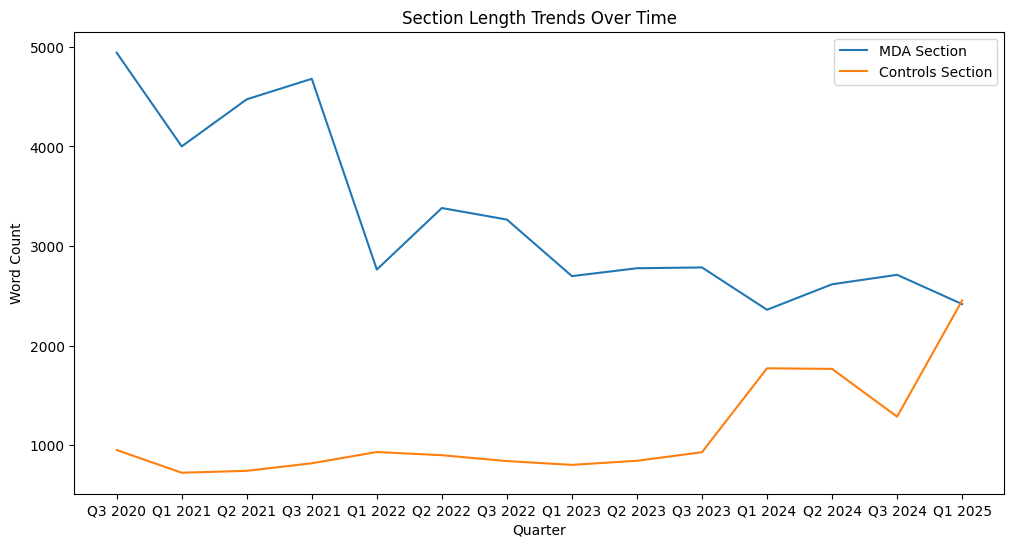

In [ ]:
# Create new columns for section lengths
df['mda_length'] = df['mda_text'].apply(lambda x: len(x.split()))
df['controls_length'] = df['controls_text'].apply(lambda x: len(x.split()))

# Plot section lengths over quarters
plt.figure(figsize=(12,6))
sns.lineplot(x='quarter', y='mda_length', data=df, label='MDA Section')
sns.lineplot(x='quarter', y='controls_length', data=df, label='Controls Section')
plt.xlabel('Quarter')
plt.ylabel('Word Count')
plt.title('Section Length Trends Over Time')
plt.legend()
plt.show()

## Top frequent terms per section

In [ ]:
# Simple text cleaning and word frequency extraction
def get_top_words(texts, n=20):
    words = ' '.join(texts).lower()
    words = re.sub(r'[^a-zA-Z ]', '', words)
    word_list = words.split()
    return Counter(word_list).most_common(n)

# Get top 20 words for each section
print("Top MDA Words:", get_top_words(df['mda_text_no_stopwords']))
print("Top Controls Words:", get_top_words(df['controls_text_no_stopwords']))

Top MDA Words: [('net', 821), ('sales', 784), ('quarter', 581), ('months', 457), ('companys', 452), ('first', 369), ('primarily', 351), ('services', 335), ('company', 330), ('form', 294), ('due', 291), ('q', 269), ('compared', 265), ('ended', 260), ('products', 247), ('billion', 246), ('higher', 241), ('gross', 223), ('tax', 208), ('statements', 200)]
Top Controls Words: [('companys', 283), ('company', 217), ('financial', 155), ('item', 108), ('shares', 101), ('may', 82), ('materially', 79), ('business', 79), ('changes', 77), ('condition', 76), ('results', 76), ('legal', 72), ('reporting', 70), ('q', 70), ('act', 69), ('form', 69), ('district', 69), ('court', 68), ('exchange', 66), ('number', 66)]


## Word Clouds

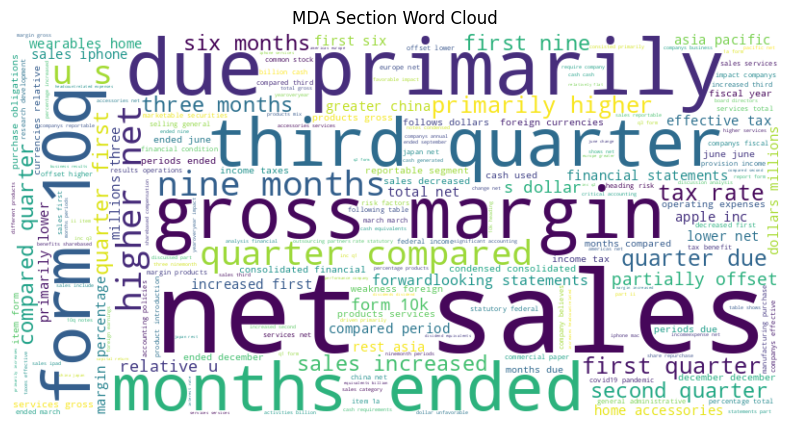

In [ ]:
# Function to plot word cloud
def plot_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word Clouds for each section
plot_wordcloud(df['mda_text_no_stopwords'], 'MDA Section Word Cloud')

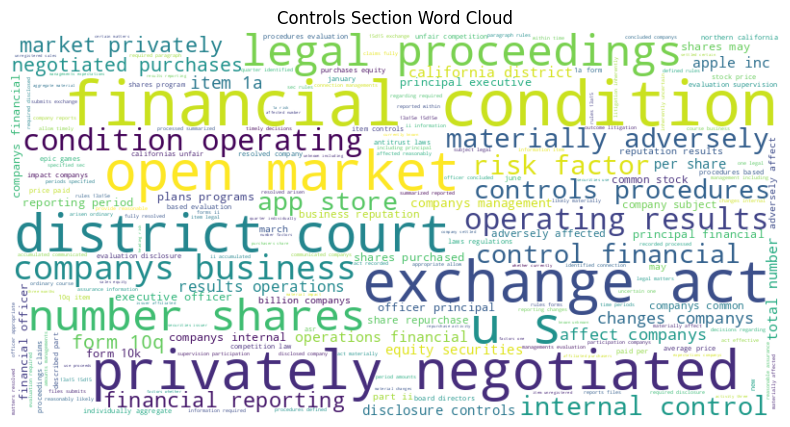

In [ ]:
plot_wordcloud(df['controls_text_no_stopwords'], 'Controls Section Word Cloud')

## Section sentiment trends over time via a rough polarity score

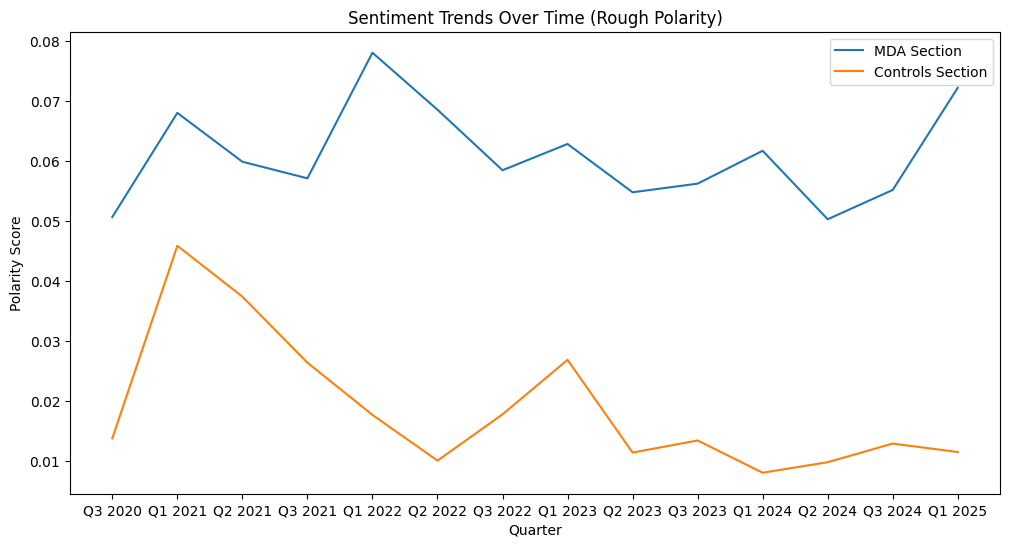

In [ ]:
# Quick polarity scoring
df['mda_polarity'] = df['mda_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['controls_polarity'] = df['controls_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot polarity trends over quarters
plt.figure(figsize=(12,6))
sns.lineplot(x='quarter', y='mda_polarity', data=df, label='MDA Section')
sns.lineplot(x='quarter', y='controls_polarity', data=df, label='Controls Section')
plt.xlabel('Quarter')
plt.ylabel('Polarity Score')
plt.title('Sentiment Trends Over Time (Rough Polarity)')
plt.legend()
plt.show()

# 4. Downstream NLP tasks

## Summarization

In [ ]:
tqdm.pandas()

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def chunk_text(text, max_tokens=1024):
    """Chunks text into smaller pieces with a maximum token limit."""
    tokenizer = tiktoken.get_encoding("cl100k_base")
    tokens = tokenizer.encode(text)
    num_chunks = (len(tokens) // max_tokens) + 1
    chunks = [tokens[i * max_tokens: (i + 1) * max_tokens] for i in range(num_chunks)]
    return [tokenizer.decode(chunk) for chunk in chunks]

def summarize_text(text):
    """Summarizes text with chunking and adjusted length."""
    chunks = chunk_text(text)
    summary = ""
    for chunk in chunks:
        try:
            chunk_summary = summarizer(chunk, max_length=200, min_length=50, do_sample=False)[0]['summary_text']
            summary += " " + chunk_summary
        except Exception as e:
            print(f"Error summarizing chunk: {e}")
    return summary.strip()

df['mda_summary'] = df['mda_text'].progress_apply(summarize_text)
df['controls_summary'] = df['controls_text'].progress_apply(summarize_text)

df.head()


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
100%|██████████| 14/14 [13:04<00:00, 56.02s/it]


,ticker,filing_date,quarter,mda_text,controls_text,mda_text_no_stopwords,controls_text_no_stopwords,mda_length,controls_length,mda_polarity,controls_polarity,mda_summary,controls_summary
0,AAPL,2020-07-31,Q3 2020,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4942,951,0.050696,0.013815,This quarterly report on form 10q contains for...,The company is subject to legal proceedings an...
1,AAPL,2021-01-28,Q1 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4001,723,0.068042,0.045904,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...
2,AAPL,2021-04-29,Q2 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4474,742,0.059908,0.037429,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...
3,AAPL,2021-07-28,Q3 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4680,818,0.057138,0.026435,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...
4,AAPL,2022-01-28,Q1 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,2764,931,0.078066,0.017729,This form 10q contains forwardlooking statemen...,The company is subject to other legal proceedi...


In [ ]:
from google.colab import files

df.to_csv("final_summarized_reports.csv", index=False)

files.download("final_summarized_reports.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Sentiment Analysis

In [ ]:
df = pd.read_csv("final_summarized_reports.csv")
df.head()

,ticker,filing_date,quarter,mda_text,controls_text,mda_text_no_stopwords,controls_text_no_stopwords,mda_length,controls_length,mda_polarity,controls_polarity,mda_summary,controls_summary
0,AAPL,2020-07-31,Q3 2020,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4942,951,0.050696,0.013815,This quarterly report on form 10q contains for...,The company is subject to legal proceedings an...
1,AAPL,2021-01-28,Q1 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4001,723,0.068042,0.045904,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...
2,AAPL,2021-04-29,Q2 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4474,742,0.059908,0.037429,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...
3,AAPL,2021-07-28,Q3 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4680,818,0.057138,0.026435,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...
4,AAPL,2022-01-28,Q1 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,2764,931,0.078066,0.017729,This form 10q contains forwardlooking statemen...,The company is subject to other legal proceedi...


In [ ]:
from transformers import pipeline, AutoTokenizer
import numpy as np

# Load FinBERT sentiment pipeline and tokenizer
sentiment_pipeline = pipeline("sentiment-analysis", model="ProsusAI/finbert", device=-1)
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

def get_sentiment_details(text, max_tokens=510):
    if not text:
        return {
            'label': 'neutral',
            'positive_score': 0.33,
            'neutral_score': 0.33,
            'negative_score': 0.33
        }

    # Tokenize and split text into chunks
    tokens = tokenizer.encode(text, add_special_tokens=False)
    chunks = [tokens[i:i+max_tokens] for i in range(0, len(tokens), max_tokens)]

    # Initialize scores
    total_scores = {'positive': 0.0, 'neutral': 0.0, 'negative': 0.0}

    # Process each chunk
    for chunk in chunks:
        chunk_text = tokenizer.decode(chunk)
        results = sentiment_pipeline(chunk_text)

        for result in results:
            label = result['label'].lower()
            score = result['score']
            total_scores[label] += score

    # Average the scores over number of chunks
    num_chunks = len(chunks)
    avg_scores = {label: score / num_chunks for label, score in total_scores.items()}

    # Find the final label
    final_label = max(avg_scores, key=avg_scores.get)

    return {
        'label': final_label,
        'positive_score': avg_scores['positive'],
        'neutral_score': avg_scores['neutral'],
        'negative_score': avg_scores['negative']
    }

# Apply on MDA section summaries
mda_sentiments = df['mda_summary'].apply(get_sentiment_details)
df['mda_sentiment'] = mda_sentiments.apply(lambda x: x['label'])
df['mda_positive_score'] = mda_sentiments.apply(lambda x: x['positive_score'])
df['mda_neutral_score']  = mda_sentiments.apply(lambda x: x['neutral_score'])
df['mda_negative_score'] = mda_sentiments.apply(lambda x: x['negative_score'])

# Apply on Controls section summaries
controls_sentiments = df['controls_summary'].apply(get_sentiment_details)
df['controls_sentiment'] = controls_sentiments.apply(lambda x: x['label'])
df['controls_positive_score'] = controls_sentiments.apply(lambda x: x['positive_score'])
df['controls_neutral_score']  = controls_sentiments.apply(lambda x: x['neutral_score'])
df['controls_negative_score'] = controls_sentiments.apply(lambda x: x['negative_score'])

df.head()


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (670 > 512). Running this sequence through the model will result in indexing errors


,ticker,filing_date,quarter,mda_text,controls_text,mda_text_no_stopwords,controls_text_no_stopwords,mda_length,controls_length,mda_polarity,...,mda_summary,controls_summary,mda_sentiment,mda_positive_score,mda_neutral_score,mda_negative_score,controls_sentiment,controls_positive_score,controls_neutral_score,controls_negative_score
0,AAPL,2020-07-31,Q3 2020,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4942,951,0.050696,...,This quarterly report on form 10q contains for...,The company is subject to legal proceedings an...,neutral,0.000000,0.472468,0.251919,neutral,0.0,0.951710,0.000000
1,AAPL,2021-01-28,Q1 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4001,723,0.068042,...,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...,neutral,0.322058,0.449757,0.000000,negative,0.0,0.000000,0.495556
2,AAPL,2021-04-29,Q2 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4474,742,0.059908,...,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...,neutral,0.000000,0.881545,0.000000,negative,0.0,0.000000,0.505641
3,AAPL,2021-07-28,Q3 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4680,818,0.057138,...,This form 10q contains forward-looking stateme...,The company is subject to legal proceedings an...,neutral,0.000000,0.719214,0.000000,neutral,0.0,0.812412,0.000000
4,AAPL,2022-01-28,Q1 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,2764,931,0.078066,...,This form 10q contains forwardlooking statemen...,The company is subject to other legal proceedi...,positive,0.600956,0.000000,0.000000,neutral,0.0,0.940432,0.000000


In [ ]:
df.to_csv("final_sentiment_reports.csv", index=False)
files.download('final_sentiment_reports.csv')

## Keyphrase Extraction

In [ ]:
kw_model = KeyBERT(model='sentence-transformers/all-MiniLM-L6-v2')

df['mda_keyphrases'] = df['mda_summary'].apply(lambda x: kw_model.extract_keywords(x, top_n=5))
df['controls_keyphrases'] = df['controls_summary'].apply(lambda x: kw_model.extract_keywords(x, top_n=5))
df.head()


In [ ]:
all_keyphrases = []
for col in ['mda_keyphrases','controls_keyphrases']:
    phrases = df[col].explode().dropna().tolist()
    all_keyphrases.extend([phrase[0] for phrase in phrases])

keyphrase_counts = Counter(all_keyphrases)

keyphrase_df = pd.DataFrame(keyphrase_counts.items(), columns=['Keyphrase', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Keyphrase', data=keyphrase_df.head(20), palette='viridis')
plt.title("Top 20 Keyphrases Across Summarized Sections")
plt.xlabel("Frequency")
plt.ylabel("Keyphrase")
plt.tight_layout()
plt.show()


## NER

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


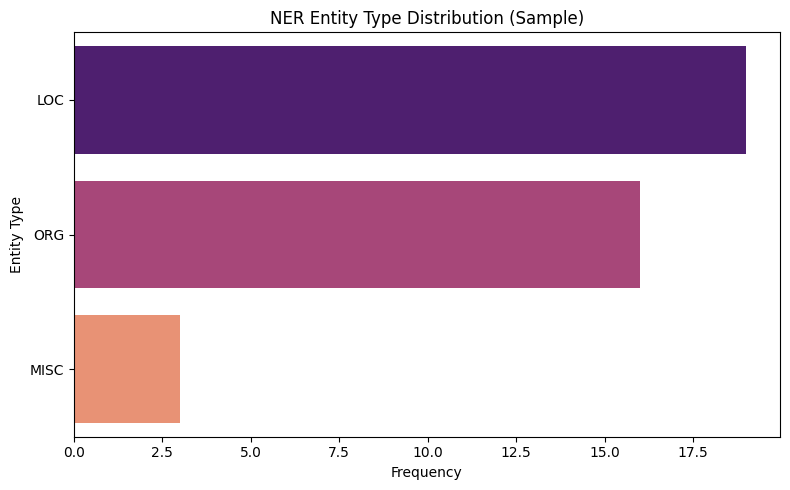

In [ ]:
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")

def extract_entities(text):
    try:
        entities = ner_pipeline(text)
        return [entity['entity_group'] for entity in entities]
    except:
        return []

sample_size = min(20, len(df))
df_sample = df.sample(n=sample_size, random_state=42)
df_sample['entities'] = df_sample['mda_summary'].apply(extract_entities)


all_entities = [ent for sublist in df_sample['entities'] for ent in sublist]

entity_counts = Counter(all_entities)

entity_df = pd.DataFrame(entity_counts.items(), columns=['Entity Type', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Entity Type', data=entity_df, palette='magma')
plt.title("NER Entity Type Distribution (Sample)")
plt.xlabel("Frequency")
plt.ylabel("Entity Type")
plt.tight_layout()
plt.show()


# 5. Correlation of Sentiments with stock-movement

In [ ]:
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2025-03-31')
print(stock_data.head())

In [ ]:
ticker = yf.Ticker("AAPL")
earnings_dates = ticker.get_earnings_dates(limit=30)
print(earnings_dates)


In [ ]:
earnings_dates = earnings_dates.dropna()
earnings_dates

In [ ]:
earnings_dates = earnings_dates.reset_index()
earnings_dates['quarter'] = earnings_dates['Earnings Date'].dt.to_period('Q').astype(str)
earnings_dates['quarter'] = earnings_dates['quarter'].str.replace('Q', ' Q')
earnings_dates['quarter'] = earnings_dates['quarter'].apply(lambda x: x.split()[1] + ' ' + x.split()[0]) # Reorder
earnings_dates.rename(columns={'Earnings Date': 'Report_Date'}, inplace=True)
report_df = earnings_dates[['quarter', 'Report_Date']]
report_df['Report_Date'] = report_df['Report_Date'].dt.date
print(report_df)

In [ ]:
print(stock_data.index)


DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20',
               '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26',
               '2025-03-27', '2025-03-28'],
              dtype='datetime64[ns]', name='Date', length=1317, freq=None)


In [ ]:
stock_data.index = pd.to_datetime(stock_data.index).date
print(stock_data.index)

Index([2020-01-02, 2020-01-03, 2020-01-06, 2020-01-07, 2020-01-08, 2020-01-09,
       2020-01-10, 2020-01-13, 2020-01-14, 2020-01-15,
       ...
       2025-03-17, 2025-03-18, 2025-03-19, 2025-03-20, 2025-03-21, 2025-03-24,
       2025-03-25, 2025-03-26, 2025-03-27, 2025-03-28],
      dtype='object', length=1317)


In [ ]:
for date in report_df['Report_Date']:
    if date in stock_data.index:
        print(f"Available: {date}")
    else:
        print(f"Missing: {date}")

Available: 2025-01-30
Available: 2024-10-31
Available: 2024-08-01
Available: 2024-05-02
Available: 2024-02-01
Available: 2023-11-02
Available: 2023-08-03
Available: 2023-05-04
Available: 2023-02-02
Available: 2022-10-27
Available: 2022-07-28
Available: 2022-04-28
Available: 2022-01-27
Available: 2021-10-28
Available: 2021-07-27
Available: 2021-04-28
Available: 2021-01-27
Available: 2020-10-29
Available: 2020-07-30
Available: 2020-04-30
Available: 2020-01-28
Missing: 2019-10-30
Missing: 2019-07-30
Missing: 2019-04-30
Missing: 2019-01-29
Missing: 2018-11-01


In [ ]:
# Convert stock_data index to datetime
stock_data.index = pd.to_datetime(stock_data.index)

# Convert report_df dates to datetime (if not already)
report_df['Report_Date'] = pd.to_datetime(report_df['Report_Date'])


<ipython-input-35-7189ece0208b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_df['Report_Date'] = pd.to_datetime(report_df['Report_Date'])


In [ ]:
print(stock_data.index.dtype)
print(report_df['Report_Date'].dtype)


datetime64[ns]
datetime64[ns]


In [ ]:
# Ensure stock_data is sorted by index
stock_data = stock_data.sort_index()

price_changes = []

for index, row in report_df.iterrows():
    date = pd.to_datetime(row['Report_Date'])
    quarter = row['quarter']

    try:
        # Get nearest available date on or before the report date
        available_date = stock_data.index.asof(date)

        close_today = stock_data.loc[available_date]['Close']['AAPL']
        close_1d = stock_data.loc[stock_data.index.asof(date + pd.Timedelta(days=1))]['Close']['AAPL']
        close_7d = stock_data.loc[stock_data.index.asof(date + pd.Timedelta(days=7))]['Close']['AAPL']
        close_30d = stock_data.loc[stock_data.index.asof(date + pd.Timedelta(days=30))]['Close']['AAPL']

        change_1d = (close_1d - close_today) / close_today * 100
        change_7d = (close_7d - close_today) / close_today * 100
        change_30d = (close_30d - close_today) / close_today * 100

        price_changes.append([quarter, close_today, change_1d, change_7d, change_30d])

    except Exception as e:
        print(f"Stock data missing for {quarter} — {e}")

# Convert to dataframe
price_change_df = pd.DataFrame(price_changes, columns=['quarter', 'Close_Price', 'Change_1d(%)', 'Change_7d(%)', 'Change_30d(%)'])

# Show result
print(price_change_df)


Stock data missing for Q4 2019 — NaT
Stock data missing for Q3 2019 — NaT
Stock data missing for Q2 2019 — NaT
Stock data missing for Q1 2019 — NaT
Stock data missing for Q4 2018 — NaT
    quarter  Close_Price  Change_1d(%)  Change_7d(%)  Change_30d(%)
0   Q1 2025   237.329056     -0.669215     -1.839298       1.900711
1   Q4 2024   225.413895     -1.327961      0.694963       5.170691
2   Q3 2024   217.628555      0.686948     -2.312693       4.994081
3   Q2 2024   172.216827      5.981614      6.669362      11.258601
4   Q1 2024   185.744797     -0.540501      0.781338      -3.730453
5   Q4 2023   176.278015     -0.518110      2.725683       7.840256
6   Q3 2023   189.523132     -4.802011     -6.904858      -0.760656
7   Q2 2023   164.134720      4.692698      4.801263       9.295090
8   Q1 2023   149.086563      2.440019      0.033161       0.292144
9   Q4 2022   142.898712      7.555240     -4.088389       2.455587
10  Q3 2022   155.068527      3.279318      5.376563       4.129172

In [ ]:
final_df = pd.merge(df, price_change_df, on='quarter')
final_df.head()

,ticker,filing_date,quarter,mda_text,controls_text,mda_text_no_stopwords,controls_text_no_stopwords,mda_length,controls_length,mda_polarity,...,controls_sentiment,controls_positive_score,controls_neutral_score,controls_negative_score,mda_keyphrases,controls_keyphrases,Close_Price,Change_1d(%),Change_7d(%),Change_30d(%)
0,AAPL,2020-07-31,Q3 2020,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4942,951,0.050696,...,neutral,0.0,0.951710,0.000000,"[(quarterly, 0.4697), (fiscal, 0.3892), (sales...","[(stock, 0.4705), (asrs, 0.4435), (shares, 0.4...",93.625946,10.468874,18.414055,29.984941
1,AAPL,2021-01-28,Q1 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4001,723,0.068042,...,negative,0.0,0.000000,0.495556,"[(yen, 0.3098), (sales, 0.3071), (apple, 0.299...","[(litigation, 0.5251), (proceedings, 0.4688), ...",138.761490,-3.498498,-5.715881,-14.514146
2,AAPL,2021-04-29,Q2 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4474,742,0.059908,...,negative,0.0,0.000000,0.505641,"[(covid19, 0.445), (quarterly, 0.3709), (stock...","[(litigation, 0.5265), (proceedings, 0.4665), ...",130.673386,-0.074850,-4.102403,-6.556631
3,AAPL,2021-07-28,Q3 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4680,818,0.057138,...,neutral,0.0,0.812412,0.000000,"[(repurchases, 0.4003), (sales, 0.3907), (repu...","[(apple, 0.3899), (asrs, 0.3763), (stock, 0.37...",143.820267,-1.219597,0.401988,0.675239
4,AAPL,2022-01-28,Q1 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,2764,931,0.078066,...,neutral,0.0,0.940432,0.000000,"[(future, 0.3411), (repurchased, 0.3408), (fis...","[(repurchase, 0.5502), (asrs, 0.4099), (stock,...",156.481873,6.977741,8.591869,3.667867


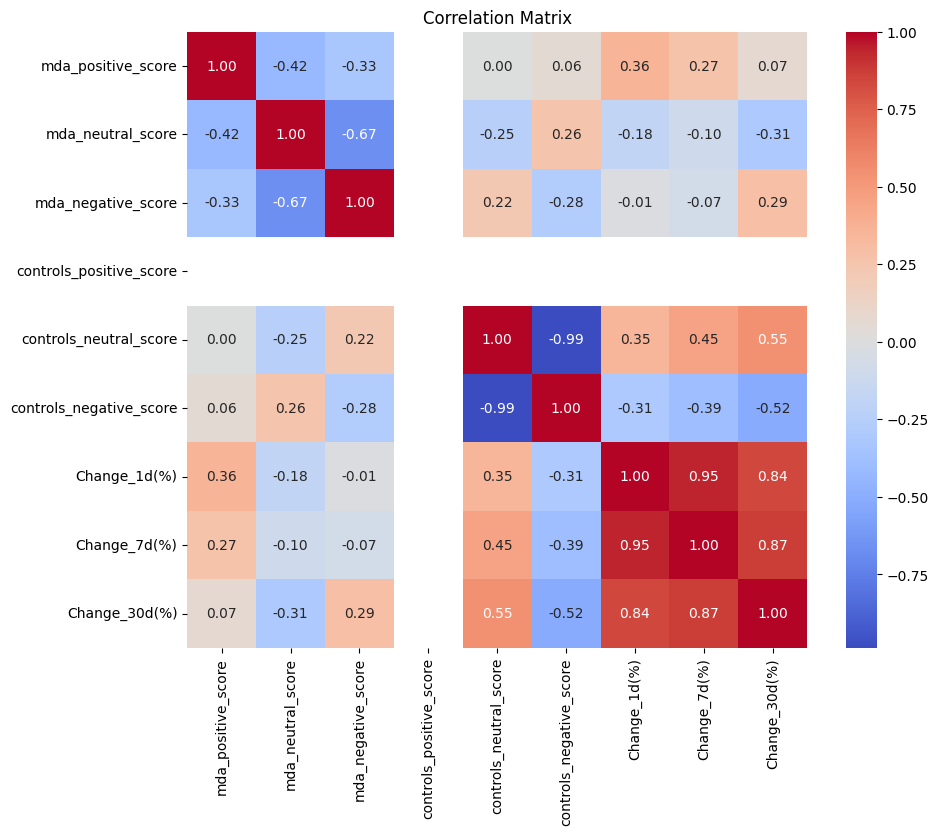

In [ ]:
correlation_matrix = final_df[['mda_positive_score', 'mda_neutral_score', 'mda_negative_score', 'controls_positive_score', 'controls_neutral_score', 'controls_negative_score', 'Change_1d(%)', 'Change_7d(%)', 'Change_30d(%)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print(correlation_matrix)

                         mda_positive_score  mda_neutral_score  \
mda_positive_score                 1.000000          -0.424487   
mda_neutral_score                 -0.424487           1.000000   
mda_negative_score                -0.330162          -0.670256   
controls_positive_score                 NaN                NaN   
controls_neutral_score             0.004620          -0.247720   
controls_negative_score            0.056625           0.257016   
Change_1d(%)                       0.356825          -0.182424   
Change_7d(%)                       0.266917          -0.101595   
Change_30d(%)                      0.074385          -0.308893   

                         mda_negative_score  controls_positive_score  \
mda_positive_score                -0.330162                      NaN   
mda_neutral_score                 -0.670256                      NaN   
mda_negative_score                 1.000000                      NaN   
controls_positive_score                 NaN        

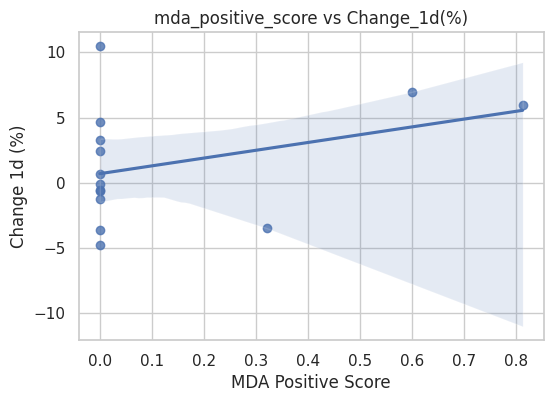

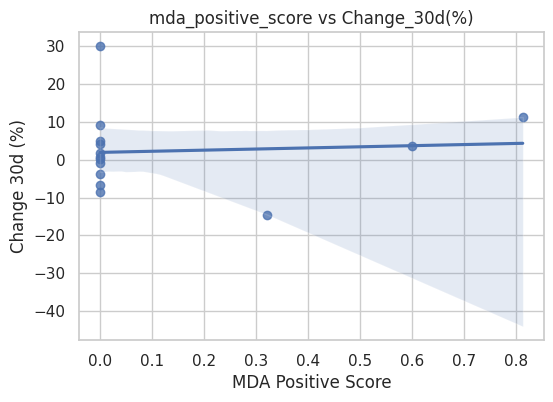

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Scatter plot for Change_1d(%)
plt.figure(figsize=(6, 4))
sns.regplot(x='mda_positive_score', y='Change_1d(%)', data=final_df)
plt.title('mda_positive_score vs Change_1d(%)')
plt.xlabel('MDA Positive Score')
plt.ylabel('Change 1d (%)')
plt.show()

# Scatter plot for Change_30d(%)
plt.figure(figsize=(6, 4))
sns.regplot(x='mda_positive_score', y='Change_30d(%)', data=final_df)
plt.title('mda_positive_score vs Change_30d(%)')
plt.xlabel('MDA Positive Score')
plt.ylabel('Change 30d (%)')
plt.show()


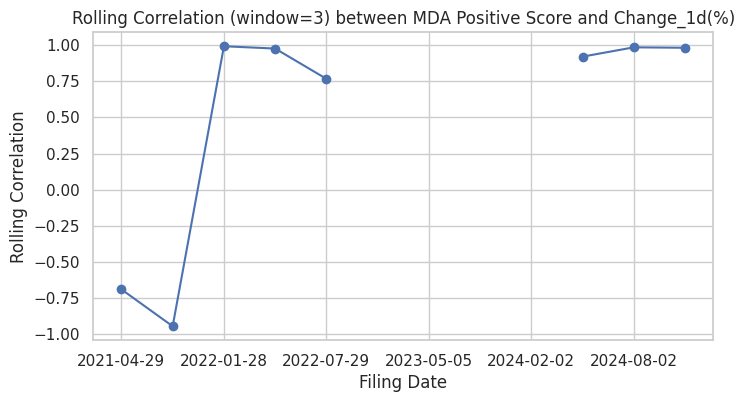

In [ ]:
# Set filing_date as datetime index
df_sorted = final_df.sort_values('filing_date').set_index('filing_date')

# Calculate 3-period rolling correlation
rolling_corr = df_sorted['mda_positive_score'].rolling(3).corr(df_sorted['Change_1d(%)'])

# Plot it
plt.figure(figsize=(8, 4))
rolling_corr.plot(marker='o')
plt.title('Rolling Correlation (window=3) between MDA Positive Score and Change_1d(%)')
plt.ylabel('Rolling Correlation')
plt.xlabel('Filing Date')
plt.grid(True)
plt.show()


In [ ]:
# Create lagged returns
df_sorted['Change_1d_lag1'] = df_sorted['Change_1d(%)'].shift(-1)
df_sorted['Change_1d_lag5'] = df_sorted['Change_1d(%)'].shift(-5)
df_sorted['Change_1d_lag30'] = df_sorted['Change_1d(%)'].shift(-30)

# Correlate with mda_positive_score
print(df_sorted[['mda_positive_score', 'Change_1d_lag1', 'Change_1d_lag5', 'Change_1d_lag30']].corr())


                    mda_positive_score  Change_1d_lag1  Change_1d_lag5  \
mda_positive_score            1.000000       -0.240711       -0.413206   
Change_1d_lag1               -0.240711        1.000000        0.631448   
Change_1d_lag5               -0.413206        0.631448        1.000000   
Change_1d_lag30                    NaN             NaN             NaN   

                    Change_1d_lag30  
mda_positive_score              NaN  
Change_1d_lag1                  NaN  
Change_1d_lag5                  NaN  
Change_1d_lag30                 NaN  


In [ ]:
import statsmodels.api as sm

# Define X and Y
X = final_df[['mda_positive_score', 'mda_neutral_score', 'mda_negative_score']]
X = sm.add_constant(X)  # adds intercept term
y = final_df['Change_1d(%)']

# Fit the model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Change_1d(%)   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.7894
Date:                Wed, 16 Apr 2025   Prob (F-statistic):              0.527
Time:                        13:58:27   Log-Likelihood:                -38.705
No. Observations:                  14   AIC:                             85.41
Df Residuals:                      10   BIC:                             87.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.6747      8

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


#6. Finetuned bert-base-uncased for sentiment analysis and comparison with FinBERT

In [ ]:
import kagglehub
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis-for-financial-news


In [ ]:
os.listdir(path)

['all-data.csv', 'FinancialPhraseBank']

In [ ]:
csv_path = os.path.join(path, 'all-data.csv')

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [4]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'datasets'

In [ ]:
df = pd.read_csv(csv_path,
                 names=["label", "text"],
                 encoding="utf-8", encoding_errors="replace")

In [ ]:
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
class FinancialDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings

        self.label_encoder = LabelEncoder()

        self.labels = self.label_encoder.fit_transform(labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = FinancialDataset(train_encodings, list(train_labels))
val_dataset = FinancialDataset(val_encodings, list(val_labels))

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    save_total_limit=1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)
trainer.train()


In [ ]:
import zipfile

with zipfile.ZipFile("results.zip", 'r') as zip_ref:
    zip_ref.extractall("results")


In [ ]:
from transformers import AutoTokenizer

model.save_pretrained("./results")
tokenizer.save_pretrained("./results")
from google.colab import files
import shutil

shutil.make_archive('results', 'zip', './results')

files.download('results.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
with zipfile.ZipFile("/content/drive/MyDrive/results.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/results")

In [10]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

new_model = AutoModelForSequenceClassification.from_pretrained("./results")
new_tokenizer = AutoTokenizer.from_pretrained("./results")

new_sentiment_pipeline = pipeline("sentiment-analysis", model=new_model, tokenizer=new_tokenizer)


Device set to use cpu


In [14]:
def get_sentiment_details(text, max_tokens=510):
    if not text:
        return {
            'label': 'neutral',
            'positive_score': 0.33,
            'neutral_score': 0.33,
            'negative_score': 0.33
        }

    # Tokenize and split text into chunks of max_tokens length
    tokens = new_tokenizer.encode(text, add_special_tokens=False)
    chunks = [tokens[i:i+max_tokens] for i in range(0, len(tokens), max_tokens)]

    # Initialize scores
    total_scores = {'positive': 0.0, 'neutral': 0.0, 'negative': 0.0}

    # Label mapping based on your fine-tuned model's output labels
    label_mapping = {
        'label_0': 'positive',
        'label_1': 'neutral',
        'label_2': 'negative'
    }

    # Process each chunk
    for chunk in chunks:
        chunk_text = new_tokenizer.decode(chunk)
        results = new_sentiment_pipeline(chunk_text)

        for result in results:
            raw_label = result['label']
            label = label_mapping.get(raw_label, 'neutral')  # Default to 'neutral' if unknown
            score = result['score']
            total_scores[label] += score

    # Average the scores over number of chunks
    num_chunks = len(chunks)
    avg_scores = {label: score / num_chunks for label, score in total_scores.items()}

    # Determine the final label based on highest average score
    final_label = max(avg_scores, key=avg_scores.get)

    return {
        'label': final_label,
        'positive_score': avg_scores['positive'],
        'neutral_score': avg_scores['neutral'],
        'negative_score': avg_scores['negative']
    }


In [15]:
df = pd.read_csv("/content/final_sentiment_reports (1).csv")

In [16]:
# Apply on MDA section summaries
mda_new_sentiments = df['mda_summary'].apply(get_sentiment_details)
df['mda_new_sentiment'] = mda_new_sentiments.apply(lambda x: x['label'])
df['mda_new_positive_score'] = mda_new_sentiments.apply(lambda x: x['positive_score'])
df['mda_new_neutral_score']  = mda_new_sentiments.apply(lambda x: x['neutral_score'])
df['mda_new_negative_score'] = mda_new_sentiments.apply(lambda x: x['negative_score'])

# Apply on Controls section summaries
controls_new_sentiments = df['controls_summary'].apply(get_sentiment_details)
df['controls_new_sentiment'] = controls_new_sentiments.apply(lambda x: x['label'])
df['controls_new_positive_score'] = controls_new_sentiments.apply(lambda x: x['positive_score'])
df['controls_new_neutral_score']  = controls_new_sentiments.apply(lambda x: x['neutral_score'])
df['controls_new_negative_score'] = controls_new_sentiments.apply(lambda x: x['negative_score'])

df.head()


,ticker,filing_date,quarter,mda_text,controls_text,mda_text_no_stopwords,controls_text_no_stopwords,mda_length,controls_length,mda_polarity,...,controls_neutral_score,controls_negative_score,mda_new_sentiment,mda_new_positive_score,mda_new_neutral_score,mda_new_negative_score,controls_new_sentiment,controls_new_positive_score,controls_new_neutral_score,controls_new_negative_score
0,AAPL,2020-07-31,Q3 2020,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4942,951,0.050696,...,0.951710,0.000000,neutral,0.0,0.966046,0.0,neutral,0.0,0.997502,0.0
1,AAPL,2021-01-28,Q1 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4001,723,0.068042,...,0.000000,0.495556,neutral,0.0,0.975980,0.0,neutral,0.0,0.989022,0.0
2,AAPL,2021-04-29,Q2 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4474,742,0.059908,...,0.000000,0.505641,neutral,0.0,0.986997,0.0,neutral,0.0,0.987187,0.0
3,AAPL,2021-07-28,Q3 2021,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,4680,818,0.057138,...,0.812412,0.000000,neutral,0.0,0.982304,0.0,neutral,0.0,0.995957,0.0
4,AAPL,2022-01-28,Q1 2022,item 2. managements discussion and analysis of...,item 4. controls and procedures evaluation of ...,item 2. managements discussion analysis financ...,item 4. controls procedures evaluation disclos...,2764,931,0.078066,...,0.940432,0.000000,neutral,0.0,0.659219,0.0,neutral,0.0,0.995381,0.0


In [17]:
df.to_csv("final_finetuned_sentiment_results.csv", index=False)
from google.colab import files
files.download("final_finetuned_sentiment_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
comparison_df = df[[
    'mda_summary',
    'mda_sentiment', 'mda_new_sentiment',
    'mda_positive_score', 'mda_new_positive_score',
    'mda_neutral_score', 'mda_new_neutral_score',
    'mda_negative_score', 'mda_new_negative_score'
]]

comparison_df.head()


,mda_summary,mda_sentiment,mda_new_sentiment,mda_positive_score,mda_new_positive_score,mda_neutral_score,mda_new_neutral_score,mda_negative_score,mda_new_negative_score
0,This quarterly report on form 10q contains for...,neutral,neutral,0.000000,0.0,0.472468,0.966046,0.251919,0.0
1,This form 10q contains forward-looking stateme...,neutral,neutral,0.322058,0.0,0.449757,0.975980,0.000000,0.0
2,This form 10q contains forward-looking stateme...,neutral,neutral,0.000000,0.0,0.881545,0.986997,0.000000,0.0
3,This form 10q contains forward-looking stateme...,neutral,neutral,0.000000,0.0,0.719214,0.982304,0.000000,0.0
4,This form 10q contains forwardlooking statemen...,positive,neutral,0.600956,0.0,0.000000,0.659219,0.000000,0.0


In [19]:
comparison_df['match'] = comparison_df.apply(
    lambda row: row['mda_sentiment'] == row['mda_new_sentiment'],
    axis=1
)


<ipython-input-19-fffcea1bce90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['match'] = comparison_df.apply(


In [20]:
print(comparison_df['match'].value_counts())


match
True     8
False    6
Name: count, dtype: int64


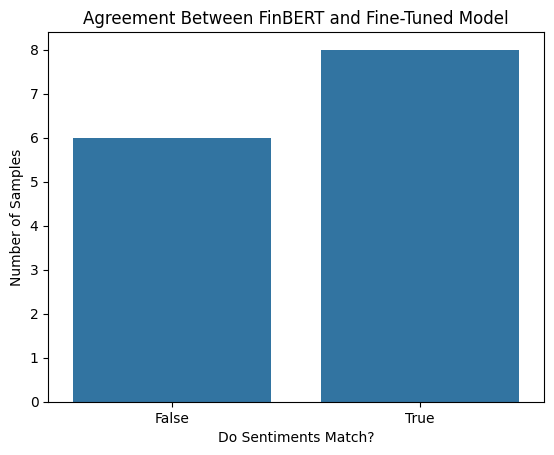

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='match', data=comparison_df)
plt.title("Agreement Between FinBERT and Fine-Tuned Model")
plt.xlabel("Do Sentiments Match?")
plt.ylabel("Number of Samples")
plt.show()


In [24]:
mda_total = len(df)
mda_correct = (df['mda_sentiment'] == df['mda_new_sentiment']).sum()
mda_accuracy = mda_correct / mda_total

print(f"MDA Section Test Accuracy vs FinBERT: {mda_accuracy:.4f}")

controls_total = len(df)
controls_correct = (df['controls_sentiment'] == df['controls_new_sentiment']).sum()
controls_accuracy = controls_correct / controls_total

print(f"Controls Section Test Accuracy vs FinBERT: {controls_accuracy:.4f}")


MDA Section Test Accuracy vs FinBERT: 0.5714
Controls Section Test Accuracy vs FinBERT: 0.8571
